# **APLICACIÓN ESTADÍSTICA AL ANÁLISIS DE DATOS**

## CLASE 14

## Prof. Esteban Arroyo


### EJERCICIO COMPLETO CLASIFICACIÓN - CLUSTER

In [1]:
#Cargamos las librerias que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Para esta actividad usaremos una base de datos de 178 tipos de vino como tinto, rosado y blanco (con códigos: 1,2,3). Posee una serie de variables métricas como:
* Alcohol = Nivel de alcohol
* Malic  = nivel de acidez
* Ash   = nivel de residuos
* Alcalinity = nivel de alcalinidad
* Magnesium = nivel de magnesio
* Phenols = nivel de fenólicos (afecta los sabores amargos y astringentes)
* Flavanoids = niveles de flavonoides (presentes en vino tinto)
* Nonflavanoids = niveles de no flavonoides
* Proanthocyanin = niveles de proantocianidinas
* Color = niveles de coloración del vino
* Hue = tonalidad del vino tinto
* Dilution = nivel de dilusión en agua
* Proline = niveles de prolina en el vino

In [2]:
# Cargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/estebanlab2021/python_analysis/master/datos/wine.csv')
print(df)
print(df.shape)

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  D

In [3]:
print(df.Type.value_counts()) #verificamos la variable objetivo

Type
2    71
1    59
3    48
Name: count, dtype: int64


Como las clases/modalidades/alternativas están en códigos del 1 al 3, debemos recodificar para poder usarlos en el modelo K-Nearest Neighbors

In [4]:
# Lo que hacemos es simplemente reemplazar el 3 por un 0
df['Type'] = df['Type'].replace(3,0)
print(df.Type.value_counts()) #verificamos

Type
2    71
1    59
0    48
Name: count, dtype: int64


In [5]:
#K-Nearest Neighbors
# Separamos los datos
y = df['Type']
del df['Type']
X = df


In [6]:
#Realizamos la Normalización
scaler_data = preprocessing.MinMaxScaler().fit_transform(X)

#Lo convertimos en un dataframe para poder usarlos
scaler_data = pd.DataFrame(scaler_data, columns=X.columns, index=X.index)

In [7]:
#Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(scaler_data, y, train_size=0.7, random_state=10)

In [8]:
# Definimos los parámetros
n_vecinos = [3,5,7,9,11,15]
parametros= {'n_neighbors': n_vecinos, 'weights': ['uniform','distance'], 'metric':['euclidean','manhattan']}

# Realizamos la grilla con la funcion "GridSearchCV"
from sklearn.model_selection import GridSearchCV

Knn = KNeighborsClassifier()
Knn_cv = GridSearchCV(Knn,parametros,cv=5)   #definirmos una cross-validation de 5 K partes iguales
Knn_cv.fit(X_train, y_train)

#Vemos cuales son los mejores parametros segun la grilla
print('Best params for k-neighborns:')
print(Knn_cv.best_params_)

#Guardamos el mejor modelo de la grilla para luego obtener sus resultados de predicción
Knn = Knn_cv.best_estimator_

print("El mejor promedio de score de la cross-validation ",  Knn_cv.best_score_.round(3))
print("el Accuracy de KNN en los datos test es:", Knn.score(X_test, y_test).round(3))

Best params for k-neighborns:
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
El mejor promedio de score de la cross-validation  0.984
el Accuracy de KNN en los datos test es: 0.907


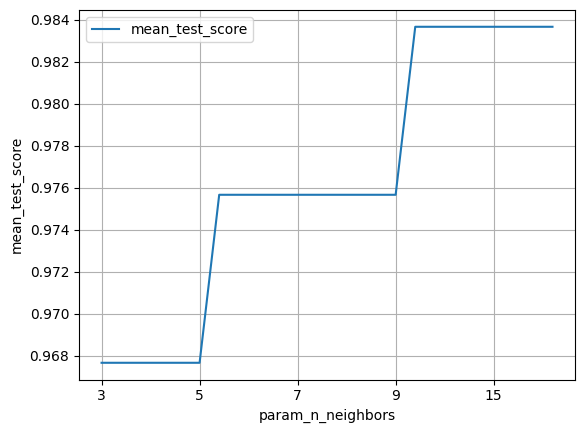

In [9]:
#Visualizamos
results = pd.DataFrame(Knn_cv.cv_results_)
ax = results.sort_values(by='param_n_neighbors').plot('param_n_neighbors', 'mean_test_score')
plt.ylabel("mean_test_score")
plt.legend()
plt.grid()
plt.show()

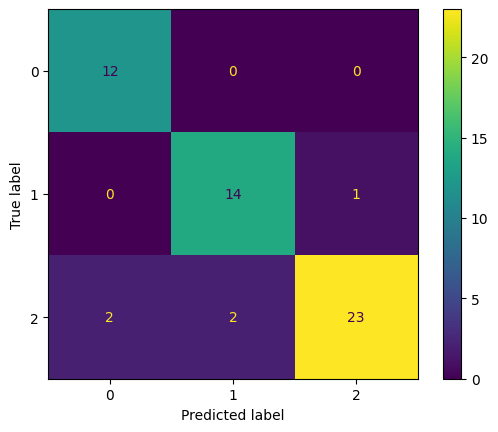

In [10]:
#obtenemos el valor de una nueva predicción
Y_pred_knn = Knn.predict(X_test)

# Hacemos la matriz de confusión del modelo
cm = confusion_matrix(y_test, Y_pred_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()

In [11]:
#Realizamos el reporte de clasificacion
Reporte = classification_report(y_test, Y_pred_knn)
print('Reporte de clasificacion: ')
print(Reporte)

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.88      0.93      0.90        15
           2       0.96      0.85      0.90        27

    accuracy                           0.91        54
   macro avg       0.90      0.93      0.91        54
weighted avg       0.91      0.91      0.91        54



## **K-MEANS**

In [12]:
#Aprovechamos y tomamos como base scaler_data, que ya está scalada y no tiene la variable Type
print(scaler_data.head())

    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  0.842105  0.191700  0.572193    0.257732   0.619565  0.627586    0.573840   
1  0.571053  0.205534  0.417112    0.030928   0.326087  0.575862    0.510549   
2  0.560526  0.320158  0.700535    0.412371   0.336957  0.627586    0.611814   
3  0.878947  0.239130  0.609626    0.319588   0.467391  0.989655    0.664557   
4  0.581579  0.365613  0.807487    0.536082   0.521739  0.627586    0.495781   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  Proline   
0       0.283019         0.593060  0.372014  0.455285  0.970696  0.561341  
1       0.245283         0.274448  0.264505  0.463415  0.780220  0.550642  
2       0.320755         0.757098  0.375427  0.447154  0.695971  0.646933  
3       0.207547         0.558360  0.556314  0.308943  0.798535  0.857347  
4       0.490566         0.444795  0.259386  0.455285  0.608059  0.325963  


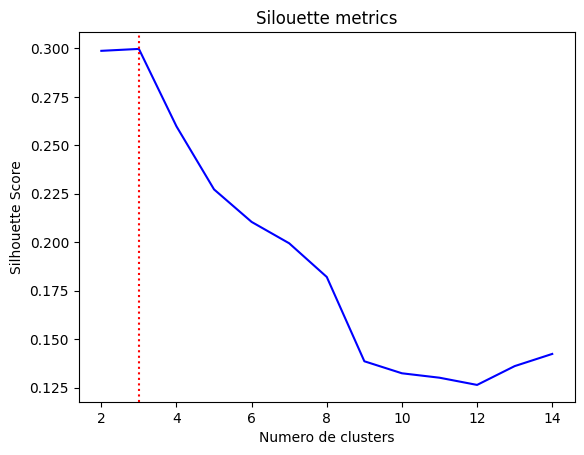

In [13]:
#Definimos el k-valor con el Método de Silhouette
from sklearn.metrics import silhouette_score

sil_scores = []
for i in range(2, 15):
  kmeans = KMeans(n_clusters = i, init='k-means++', n_init='auto', random_state = 3)
  kmeans.fit(scaler_data)
  sil_scores.append(silhouette_score(scaler_data, kmeans.labels_, metric='euclidean'))


# Graficamos para visualizar
k = range(2,15)
plt.plot(k, sil_scores, color = 'blue')
plt.axvline(x = sil_scores.index(max(sil_scores))+2, linestyle = 'dotted', color = 'red')
plt.xlabel('Numero de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silouette metrics')
plt.show()

In [14]:
# Solución con 3 clusters
kmeans = KMeans(n_clusters=3, max_iter=100,  n_init='auto', random_state=3)
kmeans.fit(scaler_data)

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=3)

In [15]:
#Guardamos las labels
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
#Tamaño de los clusters
size_clusters = pd.DataFrame(counts, columns=['size'])
print(size_clusters)

   size
0    62
1    65
2    51


In [16]:
#Agregamos los labels a la base original
df["cluster"] = labels
print(df)

     Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline   cluster  
0             0.28             2.29   5.64 

In [17]:
#Sacamos unas estadisticas por cluster
df_custer1 = df.loc[df.loc[:, 'cluster'] == 0]
print("--------------------------Cluster 1-------------------------")
print(df_custer1.iloc[:, 0:13].describe())
print("--------------------------Cluster 2-------------------------")
df_custer2 = df.loc[df.loc[:, 'cluster'] == 1]
print(df_custer2.iloc[:, 0:13].describe())
print("--------------------------Cluster 3-------------------------")
df_custer3 = df.loc[df.loc[:, 'cluster'] == 2]
print(df_custer3.iloc[:, 0:13].describe())

--------------------------Cluster 1-------------------------
         Alcohol      Malic        Ash  Alcalinity   Magnesium    Phenols  \
count  62.000000  62.000000  62.000000   62.000000   62.000000  62.000000   
mean   12.202742   1.946774   2.249839   20.211290   93.451613   2.200806   
std     0.497367   1.017681   0.319033    3.136203   14.190365   0.492565   
min    11.030000   0.740000   1.360000   10.600000   70.000000   1.100000   
25%    11.840000   1.300000   2.000000   18.025000   86.000000   1.892500   
50%    12.215000   1.645000   2.250000   20.000000   88.000000   2.200000   
75%    12.420000   2.152500   2.420000   21.900000   98.000000   2.545000   
max    13.670000   5.800000   3.230000   28.500000  151.000000   3.500000   

       Flavanoids  Nonflavanoids  Proanthocyanins      Color        Hue  \
count   62.000000      62.000000        62.000000  62.000000  62.000000   
mean     2.038710       0.369032         1.607903   2.949355   1.056387   
std      0.678406   

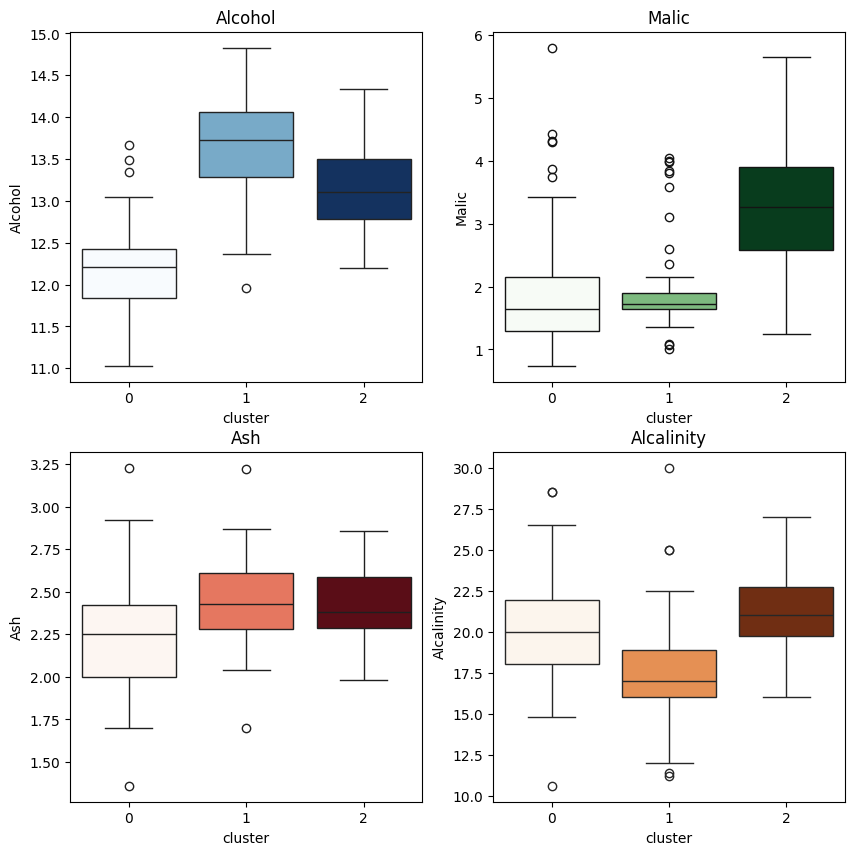

In [18]:
#Realizamos graficos comparativos
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x='cluster', y='Alcohol', hue="cluster", data=df, width=0.8, ax=axes[0, 0], palette="Blues", legend=False)
axes[0,0].set_title("Alcohol")
sns.boxplot(x='cluster', y='Malic', hue="cluster", data=df, width=0.8, ax=axes[0, 1], palette="Greens", legend=False)
axes[0,1].set_title("Malic")
sns.boxplot(x='cluster', y='Ash', hue="cluster", data=df, width=0.8, ax=axes[1, 0], palette="Reds", legend=False)
axes[1,0].set_title("Ash")
sns.boxplot(x='cluster', y='Alcalinity', hue="cluster", data=df, width=0.8, ax=axes[1, 1], palette="Oranges", legend=False)
axes[1,1].set_title("Alcalinity")

plt.show()

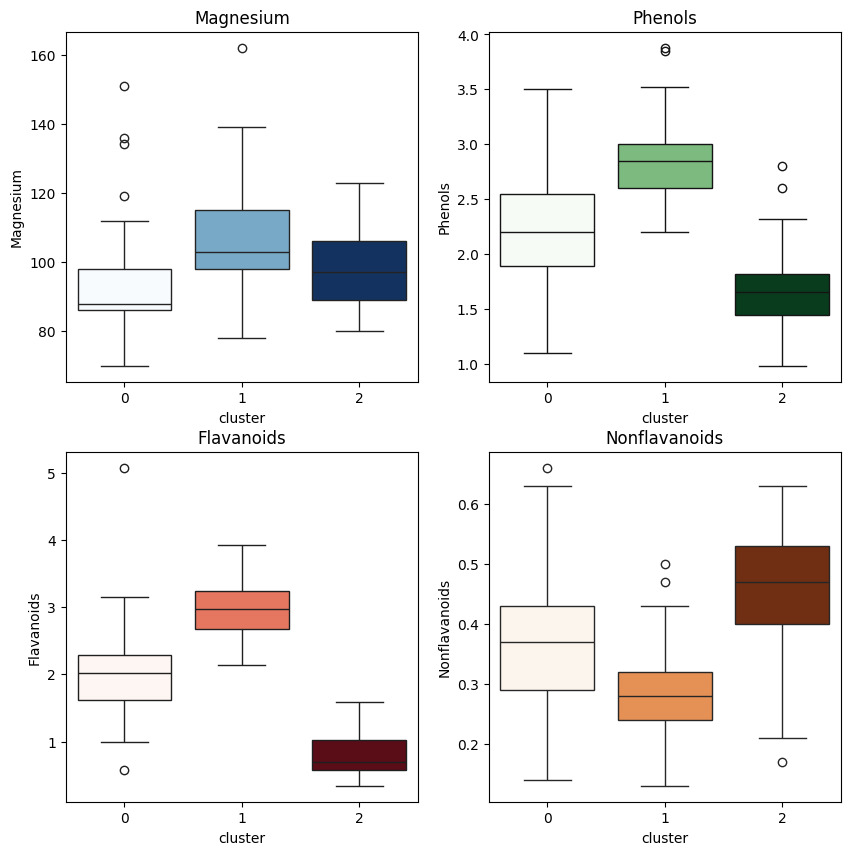

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x='cluster', y='Magnesium', hue="cluster", data=df, width=0.8, ax=axes[0, 0], palette="Blues", legend=False)
axes[0,0].set_title("Magnesium")
sns.boxplot(x='cluster', y='Phenols', hue="cluster", data=df, width=0.8, ax=axes[0, 1], palette="Greens", legend=False)
axes[0,1].set_title("Phenols")
sns.boxplot(x='cluster', y='Flavanoids', hue="cluster", data=df, width=0.8, ax=axes[1, 0], palette="Reds", legend=False)
axes[1,0].set_title("Flavanoids")
sns.boxplot(x='cluster', y='Nonflavanoids', hue="cluster", data=df, width=0.8, ax=axes[1, 1], palette="Oranges", legend=False)
axes[1,1].set_title("Nonflavanoids")

plt.show()

## **RESUMEN**

### **Regresión Lineal**

**¿Cuándo usarla?**

En general se usa la regresión lineal cuando se necesita predecir una variable dependiente continua a partir de una o varias variables independientes numéricas o continuas.

* **Predicción y pronóstico:** Se puede utilizar para predecir valores futuros basados en datos históricos. Por ejemplo, predecir ventas futuras en función de datos de ventas pasadas.
* **Análisis de tendencias:** Permite identificar y cuantificar tendencias en datos a lo largo del tiempo o de otras variables. Por ejemplo, analizar el crecimiento de la población en función del tiempo.
* **Evaluación de impacto:** Ayuda a determinar la relación entre una variable independiente y una variable dependiente. Por ejemplo, determinar cómo la publicidad afecta a las ventas de un producto.
* **Control de calidad:** Se utiliza para controlar y monitorear procesos industriales, identificando posibles relaciones entre variables de entrada y calidad del producto.
* **Optimización de precios:** Ayuda a establecer precios óptimos basados en datos históricos y variables relevantes, como costos de producción y demanda del mercado.
* **Investigación médica:** Se utiliza para analizar la relación entre factores de riesgo y enfermedades, así como para predecir resultados médicos basados en diversas variables.
* **Modelado económico:** En economía, se emplea para analizar la relación entre variables económicas como el crecimiento del PIB, el desempleo y la inflación.
* **Investigación social:** En sociología y ciencias sociales, se utiliza para analizar la relación entre variables como ingresos, educación y calidad de vida.

### **Regresión Logística**

**¿Cuándo usarla?**

Probabilidad de ocurrencia sobre un evento categórico: Cuando se trata de analizar datos en los que se desea modelar la probabilidad de ocurrencia de un evento categórico, como si un cliente comprará o no un producto o si un paciente tiene una enfermedad o no.

* **Datasets linealmente separables:** Si los datos se pueden separar en dos grupos mediante una línea recta o hiperplano, entonces la regresión logística puede proporcionar una clasificación precisa y rápida.
* **Datasets grandes:** La regresión logística es adecuada para conjuntos de datos grandes y complejos debido a su rapidez y eficiencia. La regresión logística puede manejar grandes cantidades de datos y proporcionar resultados precisos y confiables.
* **Datasets balanceados:** La regresión logística es adecuada para conjuntos de datos balanceados, lo que significa que hay aproximadamente el mismo número de observaciones en cada categoría de la variable dependiente. Esto se debe a que la regresión logística se basa en el principio de máxima verosimilitud, que asume que las categorías en la variable dependiente son igualmente probables.

### **K-nearest neighbors (kNN) o K vecinos más cercanos**

**¿Cuándo usarlo?**

Fundamentalmente para realizar **predicciones basadas en similitud.** Entonces, se puede usar kNN para la clasificación de relevancia (el cual determina qué resultados son más relevantes para una búsqueda), para motores de recomendación y búsqueda por similitud, o recomendaciones de productos. Hay que tener en cuenta que kNN es útil cuando tienes un set de datos relativamente pequeño.

**Reconocimiento de patrones:** kNN se puede usar para identificar patrones en la clasificación de dígitos o texto.

**Finanzas:** en el sector financiero, kNN se puede usar para la predicción en el mercado de valores, las cotizaciones de monedas, etc.

### **K-MEAN**

**¿Cuándo usarlo?**

Se utiliza cuando tenemos un conjunto de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos que sean más parecidos entre si.

* **Segmentación de clientes:** Puede utilizarse para dividir a los clientes en diferentes grupos en función de sus características o comportamientos. Esto puede ser útil para enviar campañas de marketing más personalizadas o para tomar decisiones de negocio.
* **Clasificación de texto:** Puede utilizarse para clasificar documentos o artículos en diferentes categorías en función de su contenido.
* **Detección de anomalías:** Puede utilizarse para detectar patrones anormales en un conjunto de datos y señalar posibles problemas o errores.



